# Example 3: Galaxy-galaxy lensing 

In this example, we'll show how to calculate $\Delta\Sigma(r),$ the galaxy-galaxy lensing signal of a mock catalog.  

In [2]:
from halotools.empirical_models import PrebuiltSubhaloModelFactory
model = PrebuiltSubhaloModelFactory('behroozi10')

from halotools.sim_manager import CachedHaloCatalog
halocat = CachedHaloCatalog(simname='bolshoi', redshift=0, halo_finder='rockstar')
model.populate_mock(halocat)

Predictions for galaxy-galaxy lensing are calculated from the cross-correlation between the galaxy positions and the dark matter density field. For the latter, we will use the dark patter particle positions stored in the `ptcl_table` attribute of the mock.

In [27]:
px = model.mock.ptcl_table['x']
py = model.mock.ptcl_table['y']
pz = model.mock.ptcl_table['z']

from halotools.mock_observables import return_xyz_formatted_array

Nptcls_to_keep = int(5e5)
randomizer = np.random.random(len(model.mock.ptcl_table))
sorted_randoms = np.sort(randomizer)
ptcl_mask = np.where(sorted_randoms < sorted_randoms[Nptcls_to_keep])[0]
particle_positions = return_xyz_formatted_array(px, py, pz, mask = ptcl_mask)


Now we will extract the *x, y, z* positions of various subsamples of our galaxies 

In [28]:
x = model.mock.galaxy_table['x']
y = model.mock.galaxy_table['y']
z = model.mock.galaxy_table['z']


In [29]:

mstar11_mask = model.mock.galaxy_table['stellar_mass'] > 1e11
mstar11_positions = return_xyz_formatted_array(x, y, z, mask = mstar11_mask)

mstar105_mask = (model.mock.galaxy_table['stellar_mass'] > 10**10.3) & (model.mock.galaxy_table['stellar_mass'] < 10**10.7)
mstar105_positions = return_xyz_formatted_array(x, y, z, mask = mstar105_mask)

mstar105_central_mask = mstar105_mask * (model.mock.galaxy_table['halo_upid'] == -1)
mstar105_central_positions = return_xyz_formatted_array(x, y, z, mask = mstar105_central_mask)

mstar105_satellite_mask = mstar105_mask * (model.mock.galaxy_table['halo_upid'] != -1)
mstar105_satellite_positions = return_xyz_formatted_array(x, y, z, mask = mstar105_satellite_mask)


In [30]:
from halotools.mock_observables import delta_sigma

rp_bins = np.logspace(-1,1,15)

particle_masses = halocat.particle_mass
period=model.mock.Lbox
downsampling_factor = (halocat.num_ptcl_per_dim**3)/float(len(particle_positions))

In [33]:
rp, result_mstar11_in_mpc = delta_sigma(mstar11_positions, particle_positions, 
                                     particle_masses, downsampling_factor,
                                    rp_bins, period, cosmology=halocat.cosmology, num_threads='max')

rp, result_mstar105_in_mpc = delta_sigma(mstar105_positions, particle_positions, 
                                     particle_masses, downsampling_factor,
                                    rp_bins, period, cosmology=halocat.cosmology, num_threads='max')

rp, result_mstar105_central_in_mpc = delta_sigma(mstar105_central_positions, particle_positions, 
                                     particle_masses, downsampling_factor,
                                    rp_bins, period, cosmology=halocat.cosmology, num_threads='max')

rp, result_mstar105_satellite_in_mpc = delta_sigma(mstar105_satellite_positions, particle_positions, 
                                     particle_masses, downsampling_factor,
                                    rp_bins, period, cosmology=halocat.cosmology, num_threads='max')

In [34]:
length_unit_conversion = 1e6
result_mstar11_in_pc = result_mstar11_in_mpc/length_unit_conversion**2
result_mstar105_in_pc = result_mstar105_in_mpc/length_unit_conversion**2
result_mstar105_satellite_in_pc = result_mstar105_satellite_in_mpc/length_unit_conversion**2
result_mstar105_central_in_pc = result_mstar105_central_in_mpc/length_unit_conversion**2

In [35]:
%matplotlib inline

(array([  1.00000000e-02,   1.00000000e-01,   1.00000000e+00,
          1.00000000e+01,   1.00000000e+02,   1.00000000e+03,
          1.00000000e+04]), <a list of 7 Text yticklabel objects>)

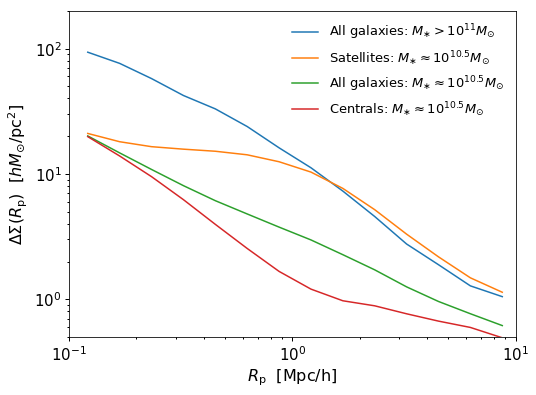

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

__=plt.loglog()

__=ax.plot(rp, result_mstar11_in_pc, label=r'All galaxies: $M_{\ast} > 10^{11}M_{\odot}$')
__=ax.plot(rp, result_mstar105_satellite_in_pc, label=r'Satellites: $M_{\ast} \approx 10^{10.5}M_{\odot}$')
__=ax.plot(rp, result_mstar105_in_pc, label=r'All galaxies: $M_{\ast} \approx 10^{10.5}M_{\odot}$')
__=ax.plot(rp, result_mstar105_central_in_pc, label=r'Centrals: $M_{\ast} \approx 10^{10.5}M_{\odot}$')

__=ax.set_xlim(xmin = 0.1, xmax = 10)
__=ax.set_ylim(ymin = 0.5, ymax = 200)

__=ax.set_xlabel(r'$R_{\rm p} $  $\rm{[Mpc / h]}$', fontsize=16)
__=ax.set_ylabel(r'$\Delta\Sigma(R_{\rm p})$  $[h M_{\odot} / {\rm pc}^2]$', fontsize=16)
__=ax.legend(loc='best', fontsize=13)
__=plt.xticks(fontsize=15); plt.yticks(fontsize=15) 
